# Plotting for Exploratory data analysis (EDA)

#  Basic Terminology

* What is EDA?
* Data-point/vector/Observation
* Data-set.
* Feature/Variable/Input-variable/Dependent-varibale
* Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
* Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar



## Iris Flower dataset

Toy  Dataset: Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]
* A simple dataset to learn the basics.
* 3 flowers of Iris species. [see images on wikipedia link above]
* 1936 by Ronald Fisher.
* Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg
*  Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.
* Importance of domain knowledge.
* Why use petal and sepal dimensions as features?
* Why do we not use 'color' as a feature?



In [95]:
#!wget https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv
!pip3 install statsmodels
import warnings
warnings.filterwarnings('ignore')


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip


In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


'''downlaod iris.csv from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'''
#Load Iris.csv into a pandas dataFrame.
iris = pd.read_csv("iris.csv")



In [97]:
# (Q) how many data-points and features?
print (iris.shape)

(150, 5)


In [98]:
#(Q) What are the column names in our dataset?
print (iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [99]:
#(Q) How many data points for each class are present? 
#(or) How many flowers for each species are present?

iris["species"].value_counts()
# balanced-dataset vs imbalanced datasets
#Iris is a balanced dataset as the number of data points for every class is 50.

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

#  2-D Scatter Plot

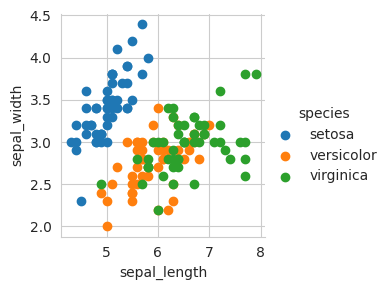

In [100]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="species") \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many combinations exist? 4C2 = 6.

**Observation(s):**
1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

What about 4-D, 5-D or n-D scatter plot?

#  Pair-plot

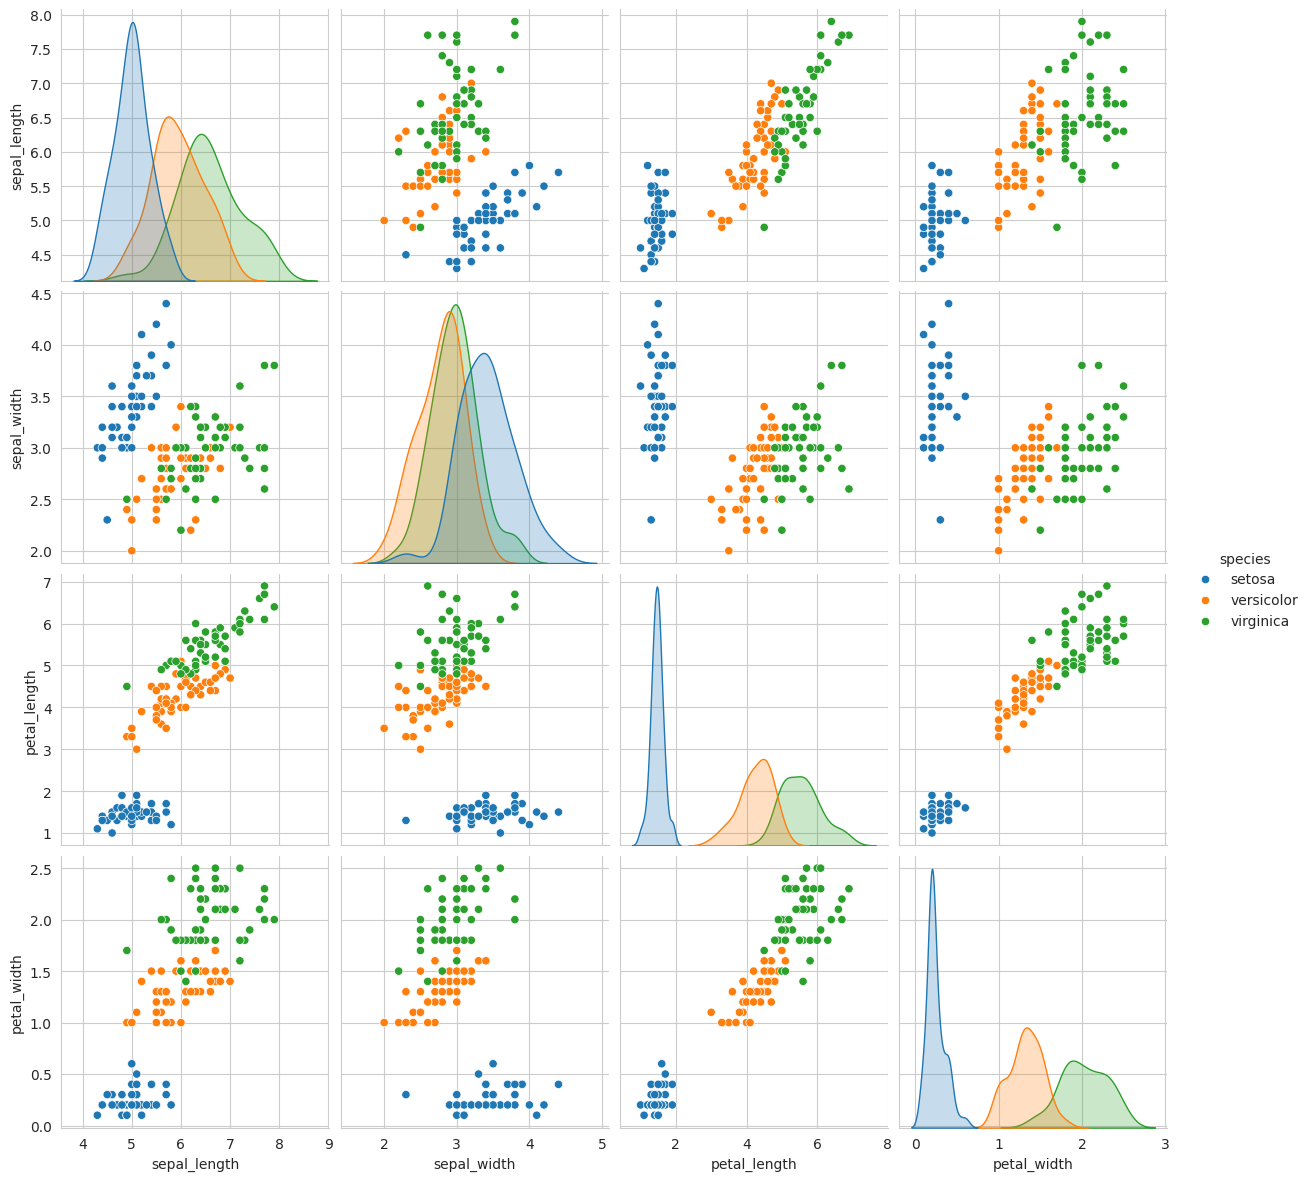

In [101]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", size=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observations**
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

#  Histogram, PDF, CDF

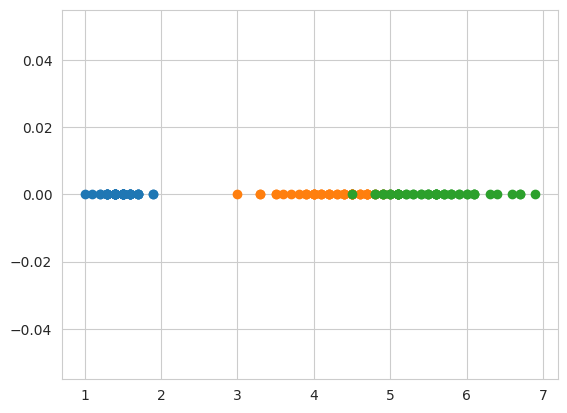

In [102]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
iris_setosa = iris.loc[iris["species"] == "setosa"];
iris_virginica = iris.loc[iris["species"] == "virginica"];
iris_versicolor = iris.loc[iris["species"] == "versicolor"];
#print(iris_setosa["petal_length"])
plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

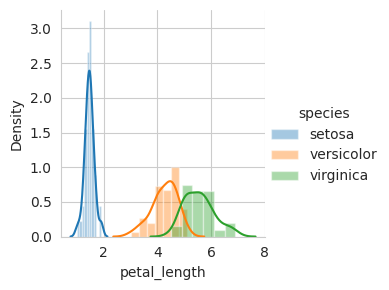

In [103]:
sns.FacetGrid(iris, hue="species") \
   .map(sns.distplot, "petal_length") \
   .add_legend();
plt.show();



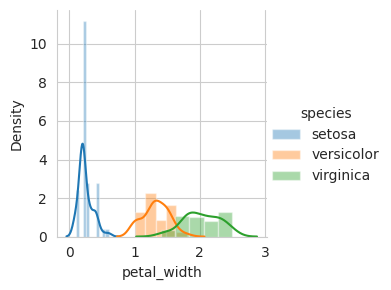

In [104]:
sns.FacetGrid(iris, hue="species") \
   .map(sns.distplot, "petal_width") \
   .add_legend();
plt.show();

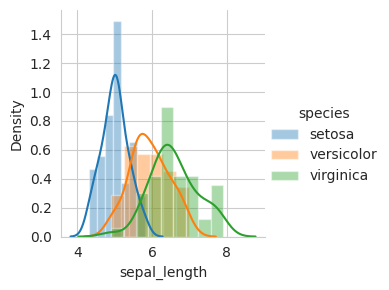

In [105]:
sns.FacetGrid(iris, hue="species") \
   .map(sns.distplot, "sepal_length") \
   .add_legend();
plt.show();

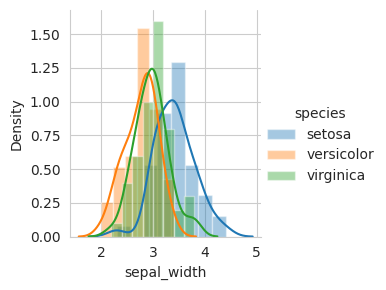

In [106]:
sns.FacetGrid(iris, hue="species") \
   .map(sns.distplot, "sepal_width") \
   .add_legend();
plt.show();

### Histograms and Probability Density Functions (PDF) using KDE
#### How to compute PDFs using counts/frequencies of data points in each window.
#### How window width effects the PDF plot.


### Interpreting a PDF:
#### why is it called a density plot?
#### Why is it called a probability plot?
#### for each value of petal_length, what does the value on y-axis mean?
#### Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
#### Using just one feature, we can build a simple "model" using if..else... statements.

### Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?

#### Do some of these plots look like a bell-curve you studied in under-grad?
#### Gaussian/Normal distribution.
#### What is "normal" about normal distribution?
#### e.g: Heights of male students in a class.
#### One of the most frequent distributions in nature.


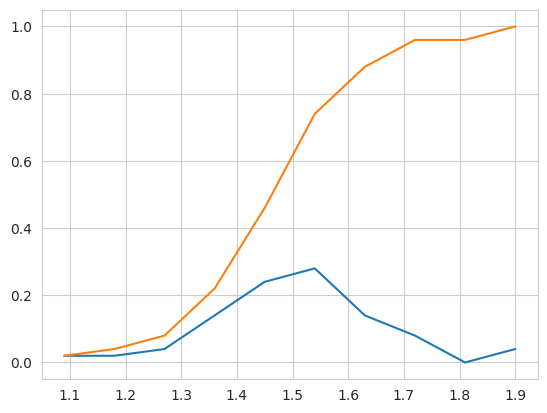

In [107]:
# CDF(Cummulative distribution function) plot for PetalLengthCm
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()